In [25]:
# Task 1: Data Loading and Exploration
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("customer_churn_data.csv")

# Check basic info
print(df.shape)


(10000, 24)


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

In [29]:
print(df.head())

   customer_id  age  gender  senior_citizen partner dependents  tenure  \
0  CUST_000001   52    Male               0     Yes        Yes       7   
1  CUST_000002   42    Male               0     Yes         No      32   
2  CUST_000003   54    Male               0      No        Yes      12   
3  CUST_000004   67    Male               1      No         No       3   
4  CUST_000005   41  Female               0     Yes         No       7   

  phone_service multiple_lines internet_service  ...         streaming_tv  \
0           Yes             No      Fiber optic  ...                  Yes   
1           Yes             No               No  ...  No internet service   
2           Yes            Yes      Fiber optic  ...                  Yes   
3           Yes             No              DSL  ...                   No   
4           Yes             No      Fiber optic  ...                   No   

      streaming_movies        contract paperless_billing  \
0                   No        On

In [31]:
# Check missing values
print(df.isnull().sum())

customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
internet_service         0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
contract                 0
paperless_billing        0
payment_method           0
monthly_charges          0
total_charges            0
customer_satisfaction    0
support_calls            0
churn                    0
dtype: int64


In [33]:
# Summary statistics for numeric features
print(df.describe())

                age  senior_citizen        tenure  monthly_charges  \
count  10000.000000    10000.000000  10000.000000     10000.000000   
mean      44.662500        0.092300     22.216800        53.640204   
std       14.397976        0.289463     19.963232        17.047669   
min       18.000000        0.000000      1.000000        20.050000   
25%       34.000000        0.000000      6.000000        40.407500   
50%       44.000000        0.000000     16.000000        51.770000   
75%       55.000000        0.000000     33.000000        66.280000   
max       80.000000        1.000000     72.000000       111.810000   

       total_charges  customer_satisfaction  support_calls  
count   10000.000000           10000.000000   10000.000000  
mean     1192.146321               3.399300       2.007400  
std      1193.960345               1.069193       1.415184  
min        20.320000               1.000000       0.000000  
25%       306.305000               3.000000       1.000000  
50%

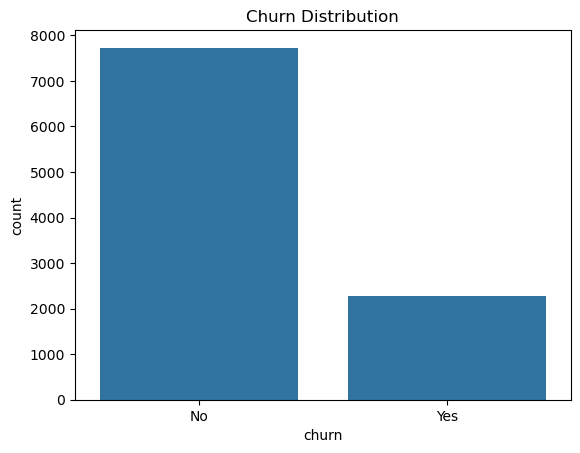

Churn Rate:
 churn
No     0.7728
Yes    0.2272
Name: proportion, dtype: float64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

churn_rate = df['churn'].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)


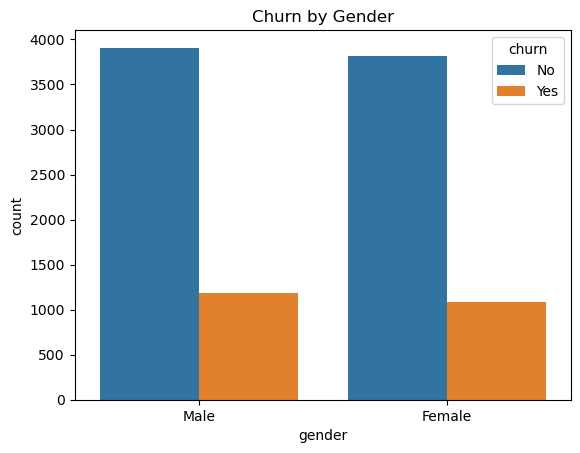

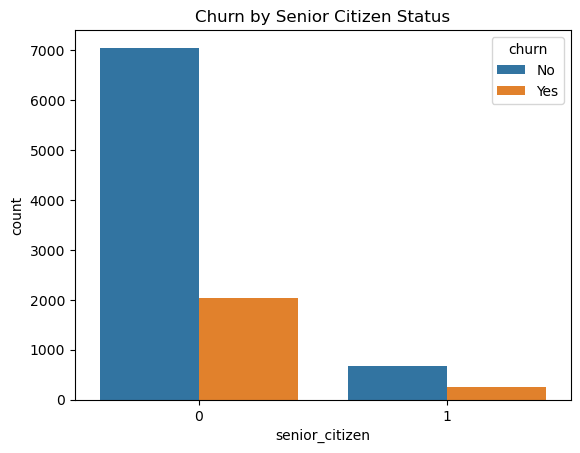

In [37]:
# Demographics impact
sns.countplot(x="gender", hue="churn", data=df)
plt.title("Churn by Gender")
plt.show()

sns.countplot(x="senior_citizen", hue="churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.show()

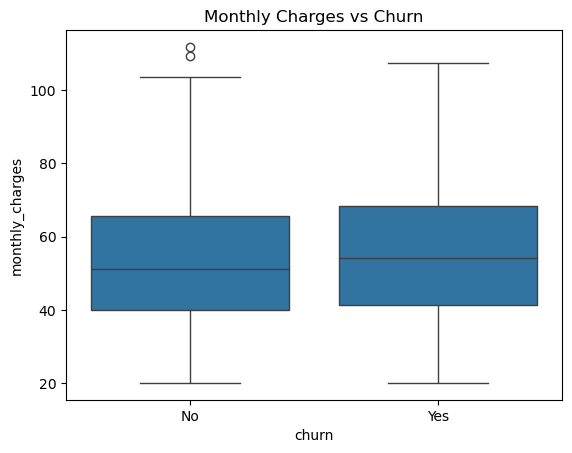

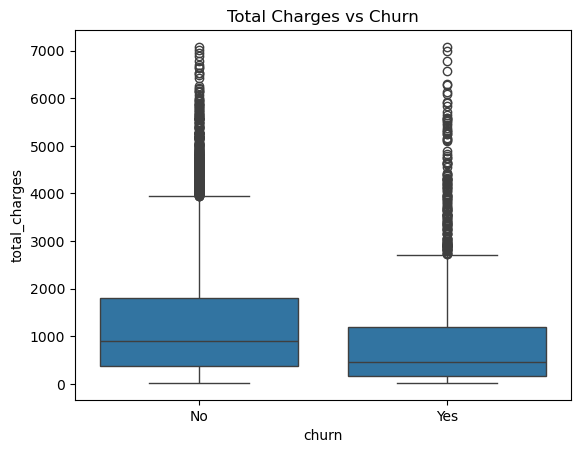

In [39]:
# Financial impact
sns.boxplot(x="churn", y="monthly_charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.boxplot(x="churn", y="total_charges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

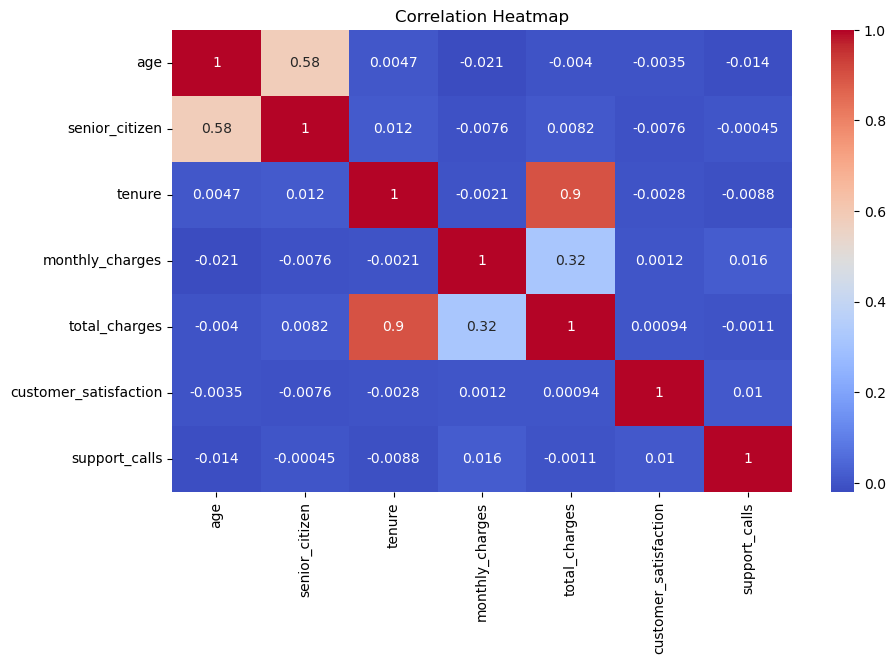

In [40]:
# Correlation heatmap
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary ID column
df = df.drop("customer_id", axis=1)

# Convert total_charges to numeric (if needed)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_charges'] = df['total_charges'].fillna(df['total_charges'].median())


# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('churn')  # target variable

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Encode target
df_encoded['churn'] = df_encoded['churn'].map({'Yes':1, 'No':0})

# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'tenure', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Split data
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("data processing done")


data processing done


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully")


Logistic Regression trained successfully
Decision Tree trained successfully
Random Forest trained successfully
SVM trained successfully


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model performance
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:\n")
print(results_df)

# Find best model (based on F1 Score)
best_model_name = results_df['F1'].idxmax()
print(f"\n✅ Best Model: {best_model_name}")

best_model = models[best_model_name]


Model Performance Comparison:

                     Accuracy  Precision    Recall        F1
Logistic Regression    0.7895   0.609272  0.202643  0.304132
Decision Tree          0.6990   0.347107  0.370044  0.358209
Random Forest          0.7930   0.638889  0.202643  0.307692
SVM                    0.7835   0.615385  0.123348  0.205505

✅ Best Model: Decision Tree
